# 911 Calls Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Reading the csv file as dataframe

In [3]:
df = pd.read_csv("911.csv")

### Information about the file

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Checking the first 3 rows

In [7]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


### The top 5 zipcodes for 911 calls

In [9]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### The top 5 townships (twp) for 911 calls

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Number of unique title codes are there? **

In [14]:
df['title'].nunique()

110

 ### Creating a new column called "reason" that contains the reason for the call

In [20]:
df["reason"] = df['title'].apply(lambda x:x.split(":")[0])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire


### The most common Reason for a 911 call

In [22]:
df['reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

### Creating a countplot of 911 calls by reason

<AxesSubplot:xlabel='reason', ylabel='count'>

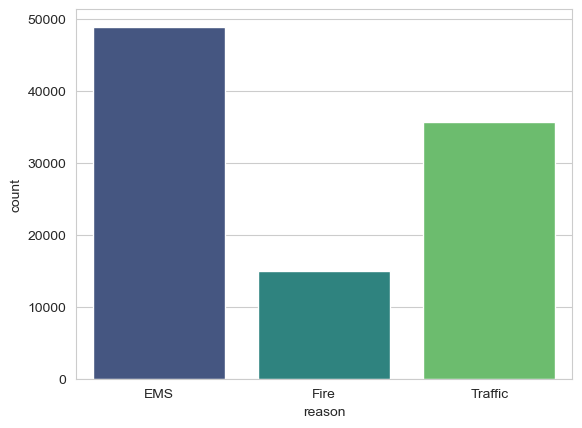

In [23]:
sns.countplot(x="reason",data=df,palette="viridis")

### Data type of the objects in the timeStamp column

In [28]:
#The iloc() function is an indexed-based selecting method which means that we have to pass an integer index in the method to select a specific row/column.
type(df['timeStamp'].iloc[0])

str

### Convert the column from strings to DateTime objects

In [29]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [99]:
df["hour"] = df["timeStamp"].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Day of Week'] = df['Day of Week'].astype(int)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,hour,Month,Day of Week,Date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS,17,12,3,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS,17,12,3,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire,17,12,3,2015-12-10,17


### The Day of Week is an integer 0-6. Using the .map() with this dictionary to map the actual string names to the day of the week

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [54]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [100]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,hour,Month,Day of Week,Date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS,17,12,Thu,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS,17,12,Thu,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire,17,12,Thu,2015-12-10,17


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

### For Month

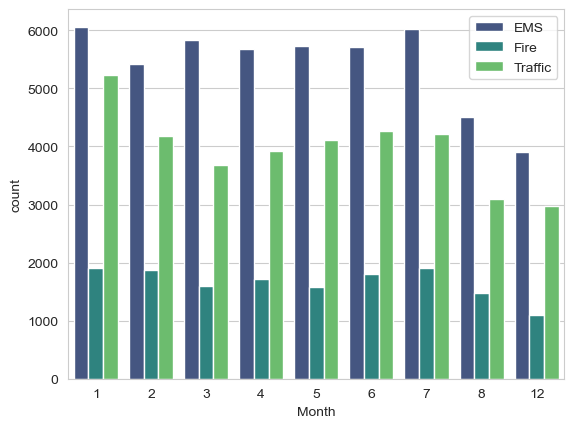

In [58]:
#hue : (optional) This parameter take column name for colour encoding.
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend()

In [59]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,0
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,0
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,0
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,0
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,0


Simple plot off of the dataframe indicating the count of calls per month

<AxesSubplot:xlabel='Month'>

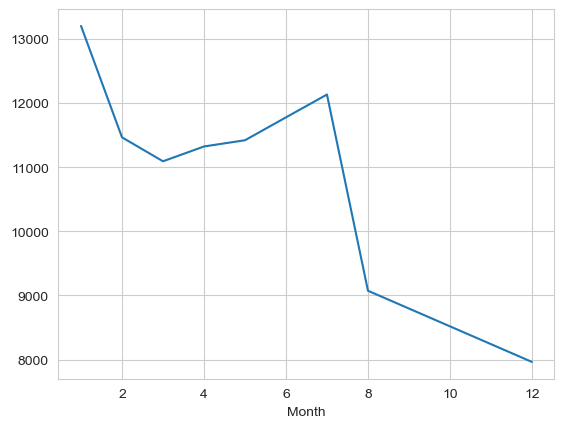

In [65]:
byMonth['twp'].plot()

### Linear fit on the number of calls per month

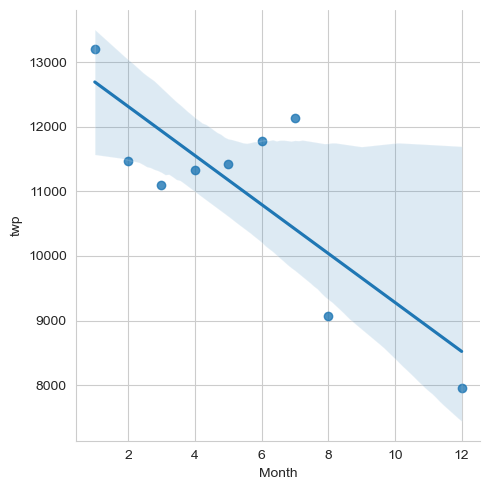

In [66]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

### Creating a new column called 'Date' that contains the date from the timeStamp column.

In [68]:
df["Date"] =  df["timeStamp"].apply(lambda x:x.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS,17,12,NaN,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS,17,12,NaN,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire,17,12,NaN,2015-12-10


### Creating a plot of counts of 911 calls.**

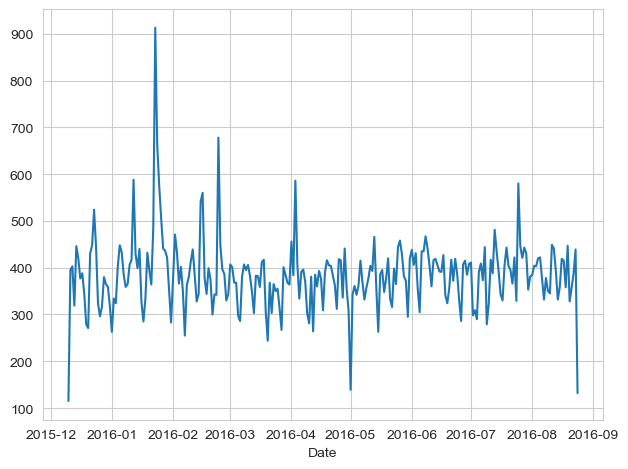

In [72]:
#bydate =df.groupby('Date').count()
#bydate["twp"].plot()
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

### Create 3 separate plots with each plot representing a Reason for the 911 call

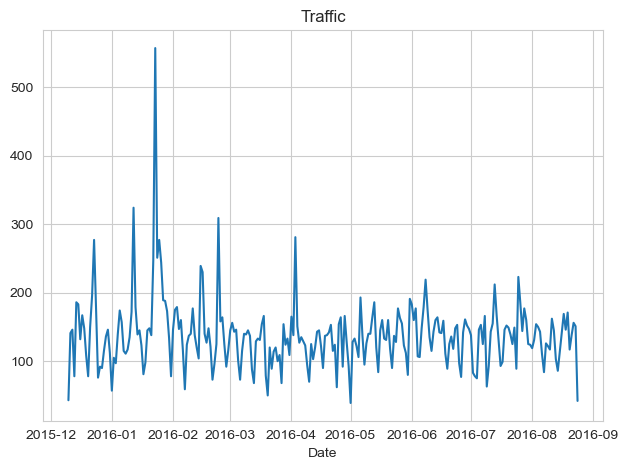

In [73]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

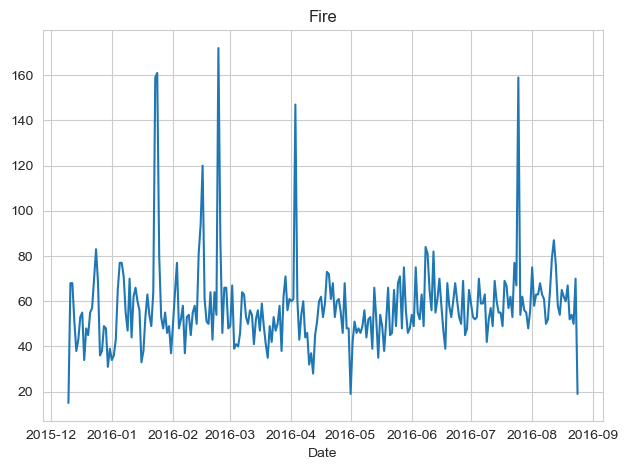

In [74]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

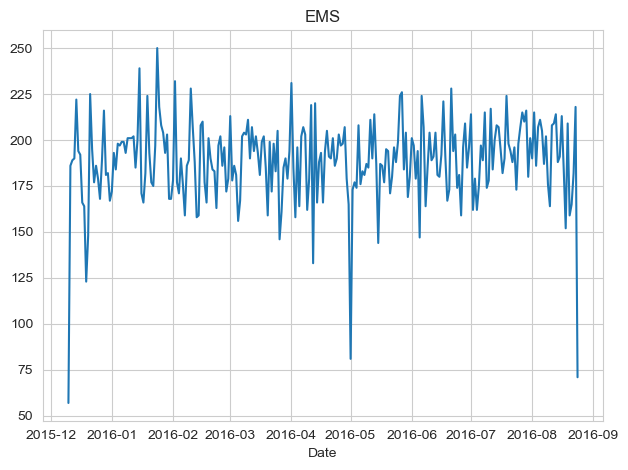

In [75]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

### Creating a HeatMap using this new DataFrame

In [101]:
df_day = df.groupby(["Day of Week" , "Hour"])["Reason"].count().unstack()
df_day

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

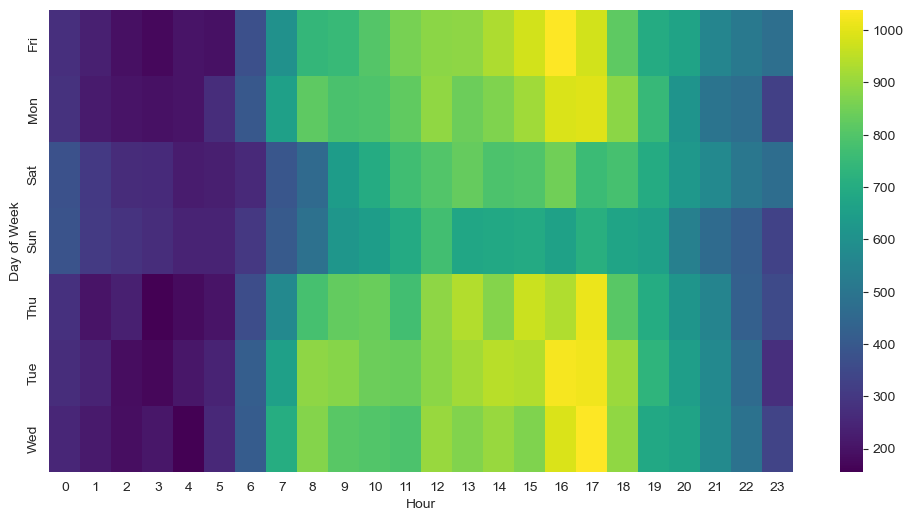

In [102]:
plt.figure(figsize=(12,6))
sns.heatmap(df_day,cmap='viridis')

### Creating a clustermap using this DataFrame. **

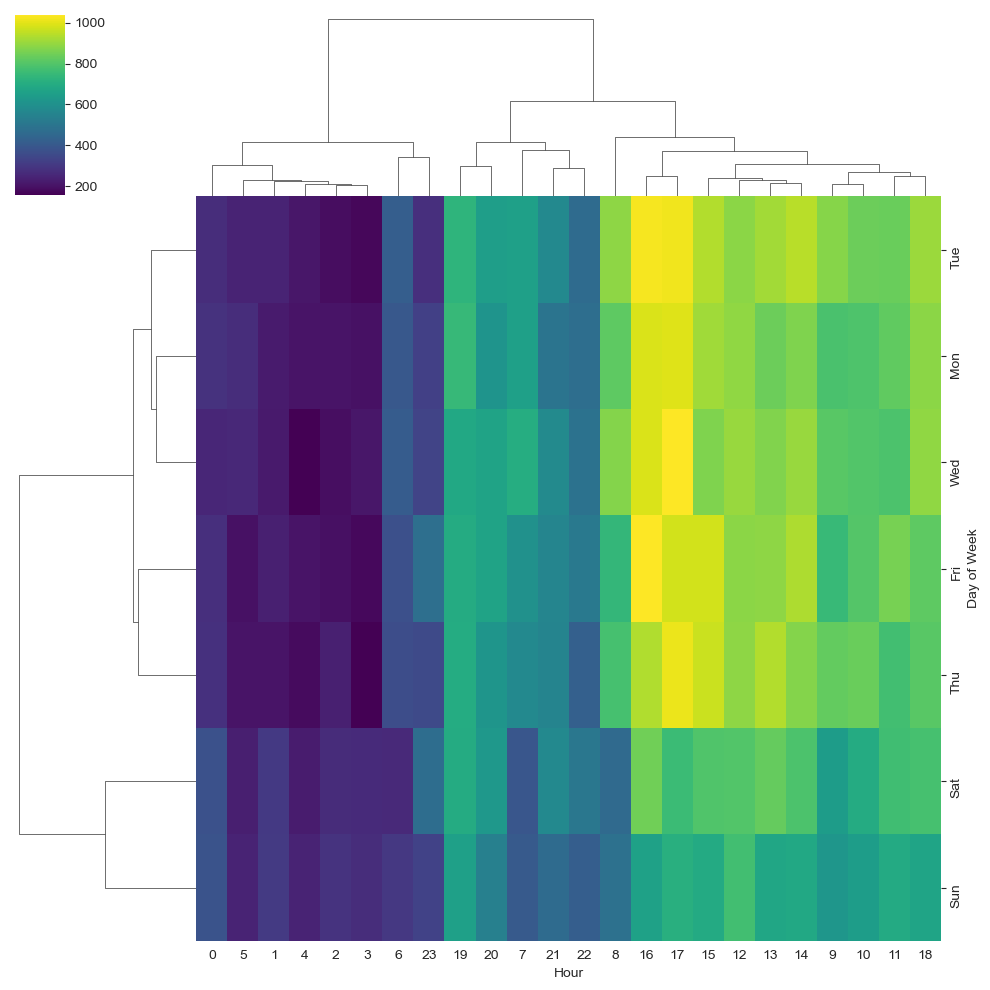

In [103]:
sns.clustermap(df_day,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [104]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

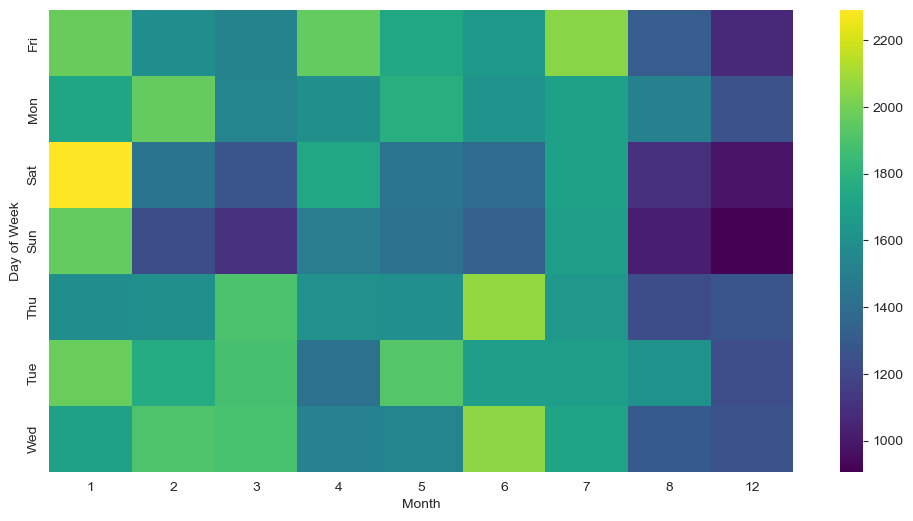

In [105]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

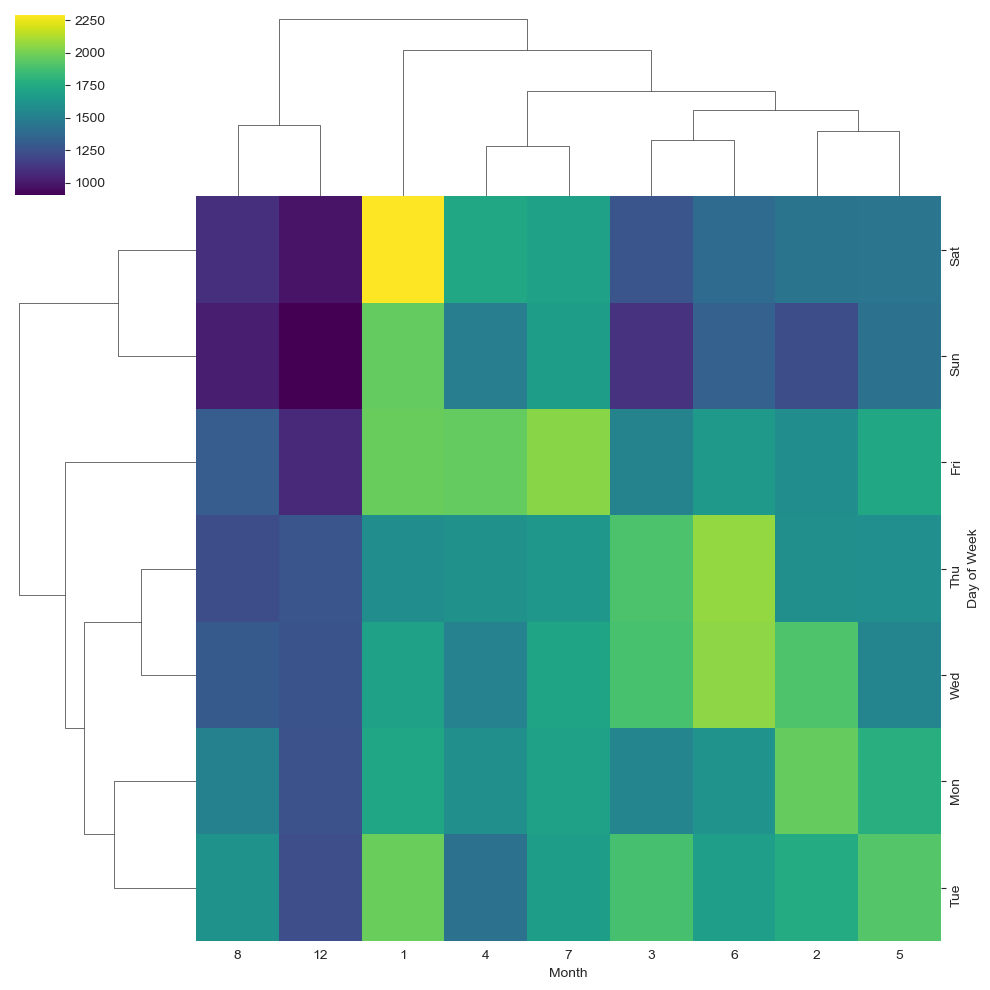

In [106]:
sns.clustermap(dayMonth,cmap='viridis')

# The End